# **TikTok Project**
**Course 6 - The Nuts and bolts of machine learning**

Recall that you are a data professional at TikTok. Your supervisor was impressed with the work you have done and has requested that you build a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

A notebook was structured and prepared to help you in this project. A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 6 End-of-course project: Classifying videos using machine learning**

In this activity, you will practice using machine learning techniques to predict on a binary outcome variable.
<br/>

**The purpose** of this model is to increase response time and system efficiency by automating the initial stages of the claims process.

**The goal** of this model is to predict whether a TikTok video presents a "claim" or presents an "opinion".
<br/>

*This activity has three parts:*

**Part 1:** Ethical considerations
* Consider the ethical implications of the request

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling

* Build the models, evaluate them, and advise on next steps

Follow the instructions and answer the questions below to complete the activity. Then, you will complete an Executive Summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.



# **Classify videos using machine learning**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following questions:


1.   **What are you being asked to do? What metric should I use to evaluate success of my business/organizational objective?**

2.   **What are the ethical implications of the model? What are the consequences of your model making errors?**
  *   What is the likely effect of the model when it predicts a false negative (i.e., when the model says a video does not contain a claim and it actually does)?

  *   What is the likely effect of the model when it predicts a false positive (i.e., when the model says a video does contain a claim and it actually does not)?

3.   **How would you proceed?**


==> ENTER YOUR RESPONSES HERE

### **Task 1. Imports and data loading**

Start by importing packages needed to build machine learning models to achieve the goal of this project.

In [1]:
# Import packages for data manipulation
import numpy as np
import pandas as pd
import pickle
import datetime as dt


# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
import sklearn.naive_bayes as bayes

# Import packages for data modeling
from sklearn.feature_extraction.text import CountVectorizer
from xgboost import XGBClassifier
from xgboost import plot_importance

Now load the data from the provided csv file into a dataframe.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

### **Task 2: Examine data, summary info, and descriptive stats**

Inspect the first five rows of the dataframe.

In [3]:
# Display first few rows
data.head()


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the number of rows and columns in the dataset.

In [4]:
# Get number of rows and columns
data.shape


(19382, 12)

Get the data types of the columns.

In [5]:
# Get data types of columns
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Get basic information about the dataset.

In [6]:
# Get basic information
data.describe()


,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Generate basic descriptive statistics about the dataset.

In [7]:
# Generate basic descriptive stats
data.isnull().sum()


#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

Check for and handle missing values.

In [8]:
# Check for missing values
data_clean=data.dropna(axis=0).reset_index(drop=True)


In [9]:
# Drop rows with missing values
data_clean.head(10)


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.0,62303.0,4293.0,1857.0
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,486192.0,193911.0,8616.0,5446.0
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.0,1072.0,50.0,22.0,11.0
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.0,1050.0,53.0,27.0
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.0,171051.0,67739.0,4104.0,2540.0


In [10]:

# Display first few rows after handling missing values
data_clean=data_clean.drop_duplicates(subset='video_id', keep='first')


Check for and handle duplicates.

In [11]:
def IQR_Column_Calculator(column):
    Median= data[column].median()
    Low_Q= data[column].quantile(0.25)
    High_Q= data[column].quantile(0.75)
    IQR= Median+1.5*(High_Q-Low_Q)
    Outlier=len(data[data[column]>IQR])
    print(f'Number of outliers, {column}:', Outlier)

columns = ["video_duration_sec","video_view_count","video_like_count","video_share_count",
            "video_download_count","video_comment_count"]
for elements in columns:
                IQR_Column_Calculator(elements)


Number of outliers, video_duration_sec: 0
Number of outliers, video_view_count: 2343
Number of outliers, video_like_count: 3468
Number of outliers, video_share_count: 3732
Number of outliers, video_download_count: 3733
Number of outliers, video_comment_count: 3882


Check for and handle outliers.

In [12]:
data_clean["claim_status"].value_counts(normalize=True)

claim_status
claim      0.503458
opinion    0.496542
Name: proportion, dtype: float64

Check class balance.

In [13]:
# Check class 
Transcription_length=[]
for comment in data_clean["video_transcription_text"]:
    Transcription_length.append(len(comment))
if len(Transcription_length)== len(data_clean["video_transcription_text"]):
    data_clean["Transcript_length"]=Transcription_length
data_clean.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,Transcript_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**
Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3: Feature engineering**

Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [14]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
data_clean.groupby("claim_status")["Transcript_length"].mean()


claim_status
claim      95.376978
opinion    82.722562
Name: Transcript_length, dtype: float64

Calculate the average text_length for claims and opinions.

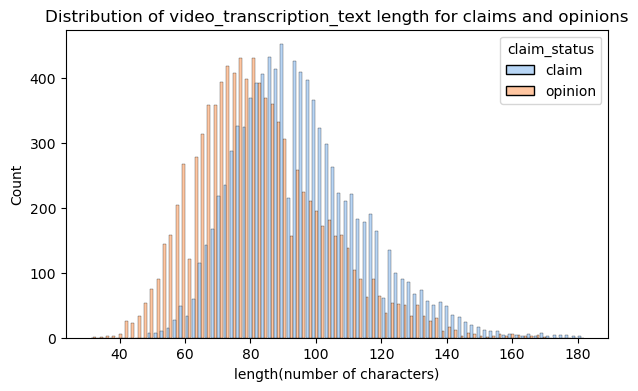

In [15]:
# Calculate the average text_length for claims and opinions
plt.figure(figsize=(7,4))
sns.histplot(data=data_clean,
             x='Transcript_length',
             hue='claim_status',
             kde=False, 
             palette="pastel",
             multiple='dodge',
             shrink=0.9,element="bars", legend=True)
plt.xlabel("length(number of characters)")
plt.ylabel("Count")
plt.title("Distribution of video_transcription_text length for claims and opinions")
plt.show()


Visualize the distribution of `text_length` for claims and opinions.

In [16]:
# Visualize the distribution of `text_length` for claims and opinions
# Create two histograms in one plot

X_data=data_clean.copy()
Column_drop=["#","video_id","video_transcription_text"]

X_data=X_data.drop(Column_drop,axis=1)
X_data["claim_status"]=X_data["claim_status"].replace({"claim":1,"opinion":0})
X_data=pd.get_dummies(X_data,drop_first=True, dtype=int)

X_data.head()

,claim_status,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,Transcript_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,1,59,343296.0,19425.0,241.0,1.0,0.0,97,0,0,1
1,1,32,140877.0,77355.0,19034.0,1161.0,684.0,107,0,0,0
2,1,31,902185.0,97690.0,2858.0,833.0,329.0,137,0,0,0
3,1,25,437506.0,239954.0,34812.0,1234.0,584.0,131,0,0,0
4,1,19,56167.0,34987.0,4110.0,547.0,152.0,128,0,0,0


In [17]:
# Create a copy of the X data
y = X_data['claim_status']

X_data=X_data.drop(["claim_status"],axis=1)

**Feature selection and transformation**

Encode target and categorical variables.

In [18]:
# Drop unnecessary columns
X_train,X_final,y_train,y_final=train_test_split(X_data,y,test_size=0.20,random_state=26)

# Encode target variable
X_CV,X_test,y_CV,y_test=train_test_split(X_train,y_train,test_size=0.25,random_state=78)

print(X_train.shape,y_train.shape,X_CV.shape,y_CV.shape,X_test.shape,y_test.shape)




(15267, 10) (15267,) (11450, 10) (11450,) (3817, 10) (3817,)


### **Task 4: Split the data**

Assign target variable.

In [19]:
# Isolate target variable
rf_m=RandomForestClassifier(random_state=37)

cv_param={"max_depth": [5,10,None],
         "max_features": [0.3,0.6],
         "max_samples": [0.7],
         "min_samples_split": [2,5],
         "n_estimators": [100,200]}
scoring={"f1","accuracy","recall","precision"}
rf_mcv1 = GridSearchCV(rf_m, cv_param, scoring=scoring, cv=5, refit='recall')


Isolate the features.

In [20]:
%%time
rf_mcv1.fit(X_CV, y_CV)


CPU times: user 2min 10s, sys: 126 ms, total: 2min 10s
Wall time: 2min 10s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=37),
             param_grid={'max_depth': [5, 10, None], 'max_features': [0.3, 0.6],
                         'max_samples': [0.7], 'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             refit='recall', scoring={'precision', 'f1', 'recall', 'accuracy'})

#### **Task 5: Create train/validate/test sets**

Split data into training and testing sets, 80/20.

In [21]:
print("The best score in the first trial of the model is: ",rf_mcv1.best_score_)
print("The best parameters of this trial was:")
rf_mcv1.best_params_

The best score in the first trial of the model is:  0.9907435905350248
The best parameters of this trial was:


{'max_depth': 10,
 'max_features': 0.6,
 'max_samples': 0.7,
 'min_samples_split': 2,
 'n_estimators': 100}

Split the training set into training and validation sets, 75/25, to result in a final ratio of 60/20/20 for train/validate/test sets.

In [22]:
# Split the training data into training and validation sets
y_rf_pred=rf_mcv1.best_estimator_.predict(X_test)


Confirm that the dimensions of the training, validation, and testing sets are in alignment.

In [23]:
# Get shape of each training, validation, and testing set
xgb_m=XGBClassifier(objective="binary:logistic",random_state=145)
xgb_param={"max_depth": [5,10,15],
         "min_child_weight": [3,7],
         "learning_rate": [0.01,0.1,0.15],
         "n_estimators": [150,400]}
scoring={"f1","accuracy","recall","precision"}
xgb_mcv1 = GridSearchCV(xgb_m, xgb_param, scoring=scoring, cv=5, refit='recall')



### **Task 6. Build models**


### **Build a random forest model**

Fit a random forest model to the training set. Use cross-validation to tune the hyperparameters and select the model that performs best on recall.

In [24]:
%%time
#xgb_mcv1.fit(X_CV, y_CV)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs


In [25]:
# Examine best recall score
#print("The best score in the first trial of the model is: ",xgb_mcv1.best_score_)
#print("The best parameters of this trial was:")
#xgb_mcv1.best_params_

In [26]:
  # Get all the results from the CV and put them in a df
#y_xgb_pred=xgb_mcv1.best_estimator_.predict(X_test)


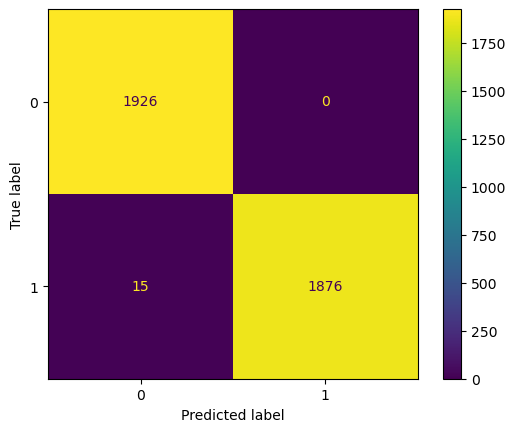

In [30]:
# Examine best parameters
log_cm_rf = metrics.confusion_matrix(y_test, y_rf_pred)

# Create display of confusion matrix
log_disp = metrics.ConfusionMatrixDisplay(confusion_matrix=log_cm_rf, display_labels=None)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()

**Question:** How well is your model performing? Consider average recall score and precision score.

### **Build an XGBoost model**

In [ ]:
# Examine best parameters
#log_cm_xgb = confusion_matrix(y_test, y_xgb_pred)

# Create display of confusion matrix
#log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm_xgb, display_labels=None)

# Plot confusion matrix
#log_disp.plot()

# Display plot
#plt.show()

In [33]:
target_labels = ['opinion', 'claim']
print("Classicifaction result table of the random forest model:")
print(metrics.classification_report(y_test, y_rf_pred, target_names=target_labels))
#print("Classicifaction result table of the Extreme boosting model:")
#print(classification_report(y_val, y_xgb_pred, target_names=target_labels))

Classicifaction result table of the random forest model:
              precision    recall  f1-score   support

     opinion       0.99      1.00      1.00      1926
       claim       1.00      0.99      1.00      1891

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



**Question:** How well does your model perform? Consider recall score and precision score.
R= The model have great results according our validation data set. The model predicts with a 99% acurracy the claims and opinions.

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**
Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 7. Evaluate model**

Evaluate models against validation criteria.

#### **Random forest**

In [34]:
# Use the random forest "best estimator" model to get predictions on the encoded testing set
y_fin_pred=rf_mcv1.best_estimator_.predict(X_final)

Display the predictions on the encoded testing set.

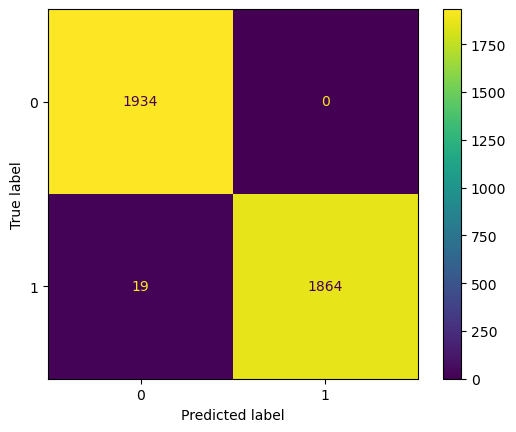

In [35]:
# Display the predictions on the encoded testing set
log_cm_champ = metrics.confusion_matrix(y_final, y_fin_pred)

# Create display of confusion matrix
log_disp = metrics.ConfusionMatrixDisplay(confusion_matrix=log_cm_champ, display_labels=None)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()

Display the true labels of the testing set.

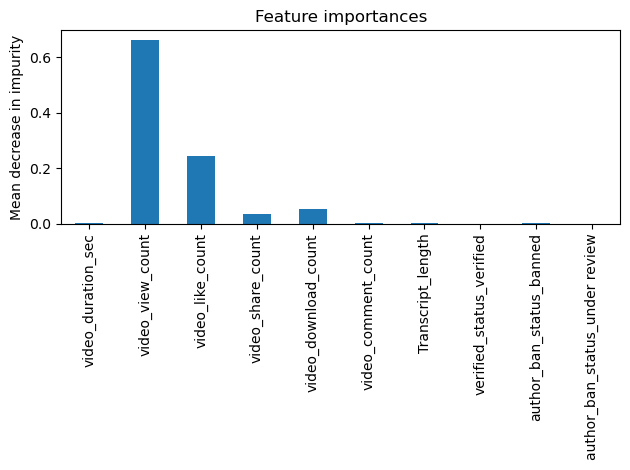

In [36]:
# Display the true labels of the testing set
importances = rf_mcv1.best_estimator_.feature_importances_
champ_importances = pd.Series(importances, index=X_final.columns)

fig, ax = plt.subplots()
champ_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()

Create a confusion matrix to visualize the results of the classification model.

In [ ]:
# Create a confusion matrix to visualize the results of the classification model

# Compute values for confusion matrix
### YOUR CODE HERE ###

# Create display of confusion matrix
### YOUR CODE HERE ###

# Plot confusion matrix
### YOUR CODE HERE ###

# Display plot
### YOUR CODE HERE ###


Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the model.

In [ ]:
# Create a classification report
# Create classification report for random forest model
### YOUR CODE HERE ###


**Question:** What does your classification report show? What does the confusion matrix indicate?

#### **XGBoost**

In [ ]:
#Evaluate XGBoost model
### YOUR CODE HERE ###


In [ ]:
# Compute values for confusion matrix
### YOUR CODE HERE ###

# Create display of confusion matrix
### YOUR CODE HERE ###

# Plot confusion matrix
### YOUR CODE HERE ###

# Display plot
### YOUR CODE HERE ###


In [ ]:
# Create a classification report
### YOUR CODE HERE ###


**Question:** Describe your XGBoost model results. How does your XGBoost model compare to your random forest model?

### **Use champion model to predict on test data**

In [ ]:
### YOUR CODE HERE ###


In [ ]:
# Compute values for confusion matrix
### YOUR CODE HERE ###

# Create display of confusion matrix
### YOUR CODE HERE ###

# Plot confusion matrix
### YOUR CODE HERE ###

# Display plot
### YOUR CODE HERE ###


#### **Feature importances of champion model**


In [ ]:
### YOUR CODE HERE ###


**Question:** Describe your most predictive features. Were your results surprising? 
R= According the results of the importance plot the most predictive features are views counts, likes counts and share counts. This features are expected with the results visualized on previous EDA.

### **Task 8. Conclusion**

In this step use the results of the models above to formulate a conclusion. Consider the following questions:

1. **Would you recommend using this model? Why or why not?**

2. **What was your model doing? Can you explain how it was making predictions?**

3. **Are there new features that you can engineer that might improve model performance?**

4. **What features would you want to have that would likely improve the performance of your model?**

Remember, sometimes your data simply will not be predictive of your chosen target. This is common. Machine learning is a powerful tool, but it is not magic. If your data does not contain predictive signal, even the most complex algorithm will not be able to deliver consistent and accurate predictions. Do not be afraid to draw this conclusion.


==> ENTER YOUR RESPONSES HERE

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.